


# TRABAJO PRACTICO - 3: GRUPO 8 

Autores:
- Choconi Lucas
- Berra Eliel 
- Mina Federico
- Scillato German


### Se realizan las importaciones necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
# pip install mixed-naive-bayes
from mixed_naive_bayes import MixedNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

Tomamos el dataset de https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Debajo se describe el dataset y los atributos.

## Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [2]:
data_location = "heart.csv"
data = pd.read_csv(data_location)
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


## Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
- Total: 1190 observations
- Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

### Observamos la distribución inicial de los datos

<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

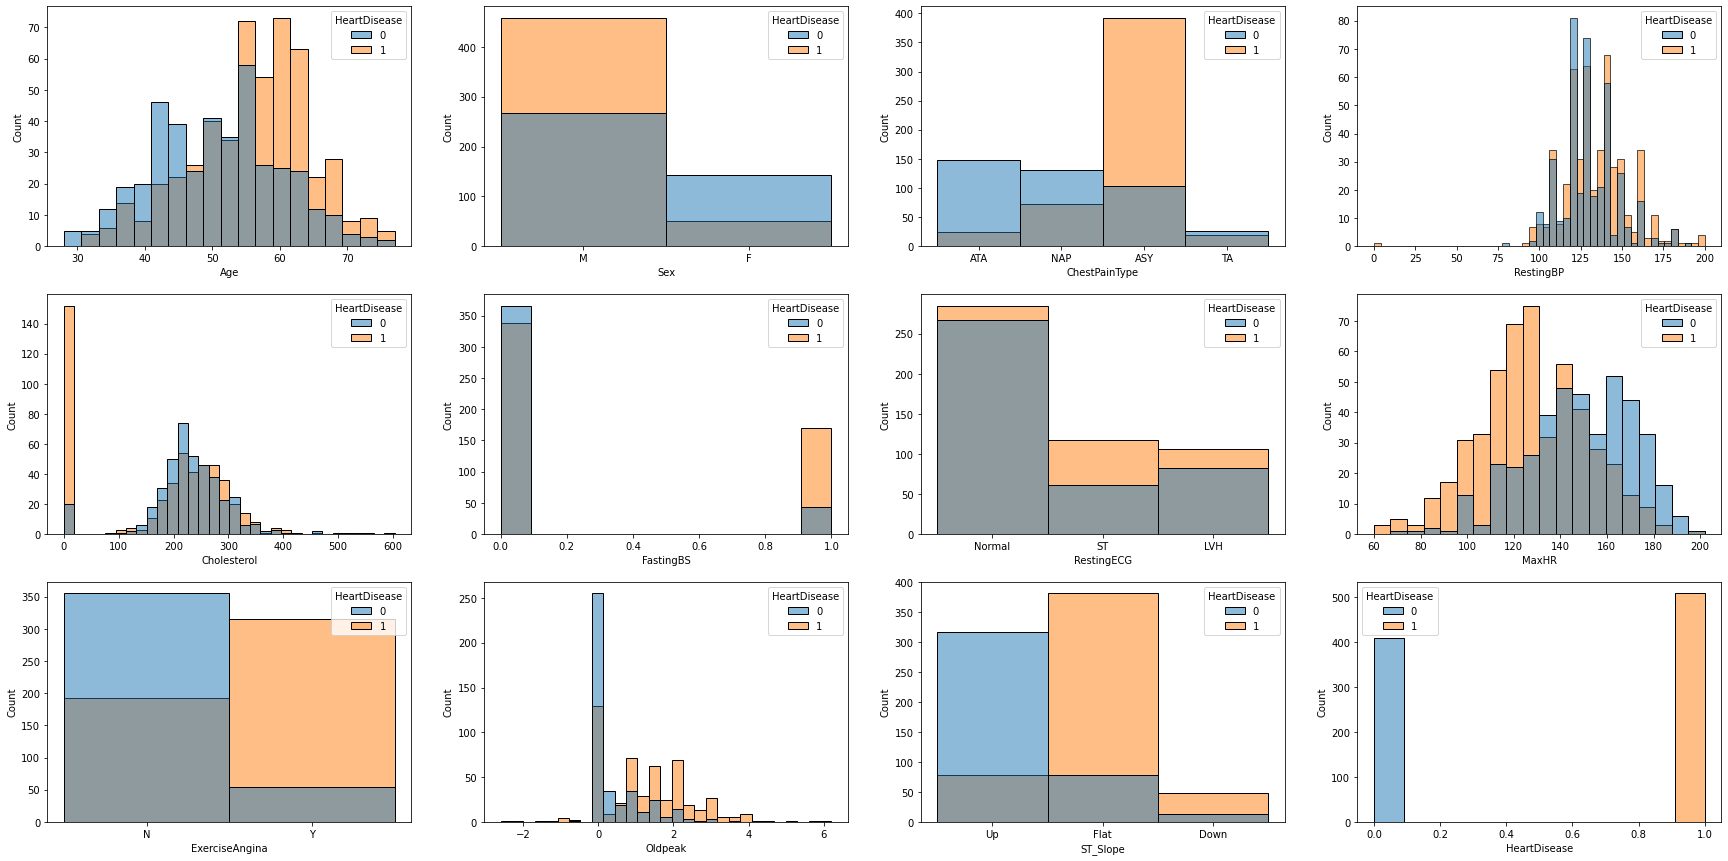

In [3]:
fig, axs = plt.subplots(3, 4,figsize=(30,15))


sns.histplot(data=data, x="Age", hue="HeartDisease", ax=axs[0,0])
sns.histplot(data=data, x="Sex", hue="HeartDisease", ax=axs[0,1])
sns.histplot(data=data, x="ChestPainType", hue="HeartDisease", ax=axs[0,2])
sns.histplot(data=data, x="RestingBP", hue="HeartDisease", ax=axs[0,3])
sns.histplot(data=data, x="Cholesterol", hue="HeartDisease", ax=axs[1,0])
sns.histplot(data=data, x="FastingBS", hue="HeartDisease", ax=axs[1,1])
sns.histplot(data=data, x="RestingECG", hue="HeartDisease", ax=axs[1,2])
sns.histplot(data=data, x="MaxHR", hue="HeartDisease", ax=axs[1,3])
sns.histplot(data=data, x="ExerciseAngina", hue="HeartDisease", ax=axs[2,0])
sns.histplot(data=data, x="Oldpeak", hue="HeartDisease", ax=axs[2,1])
sns.histplot(data=data, x="ST_Slope", hue="HeartDisease", ax=axs[2,2])
sns.histplot(data=data, x="HeartDisease",hue="HeartDisease", ax=axs[2,3])                                               

## Limpieza de Datos

Analizamos las entradas con colesterol en 0 y las eliminamos ya que esos valores son fisiológicamente imposibles.

In [4]:
data[data.Cholesterol==0].HeartDisease.value_counts()

1    152
0     20
Name: HeartDisease, dtype: int64

In [5]:
data = data[data.Cholesterol!=0]

### Volvemos a observar la distribución de los datos.

<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

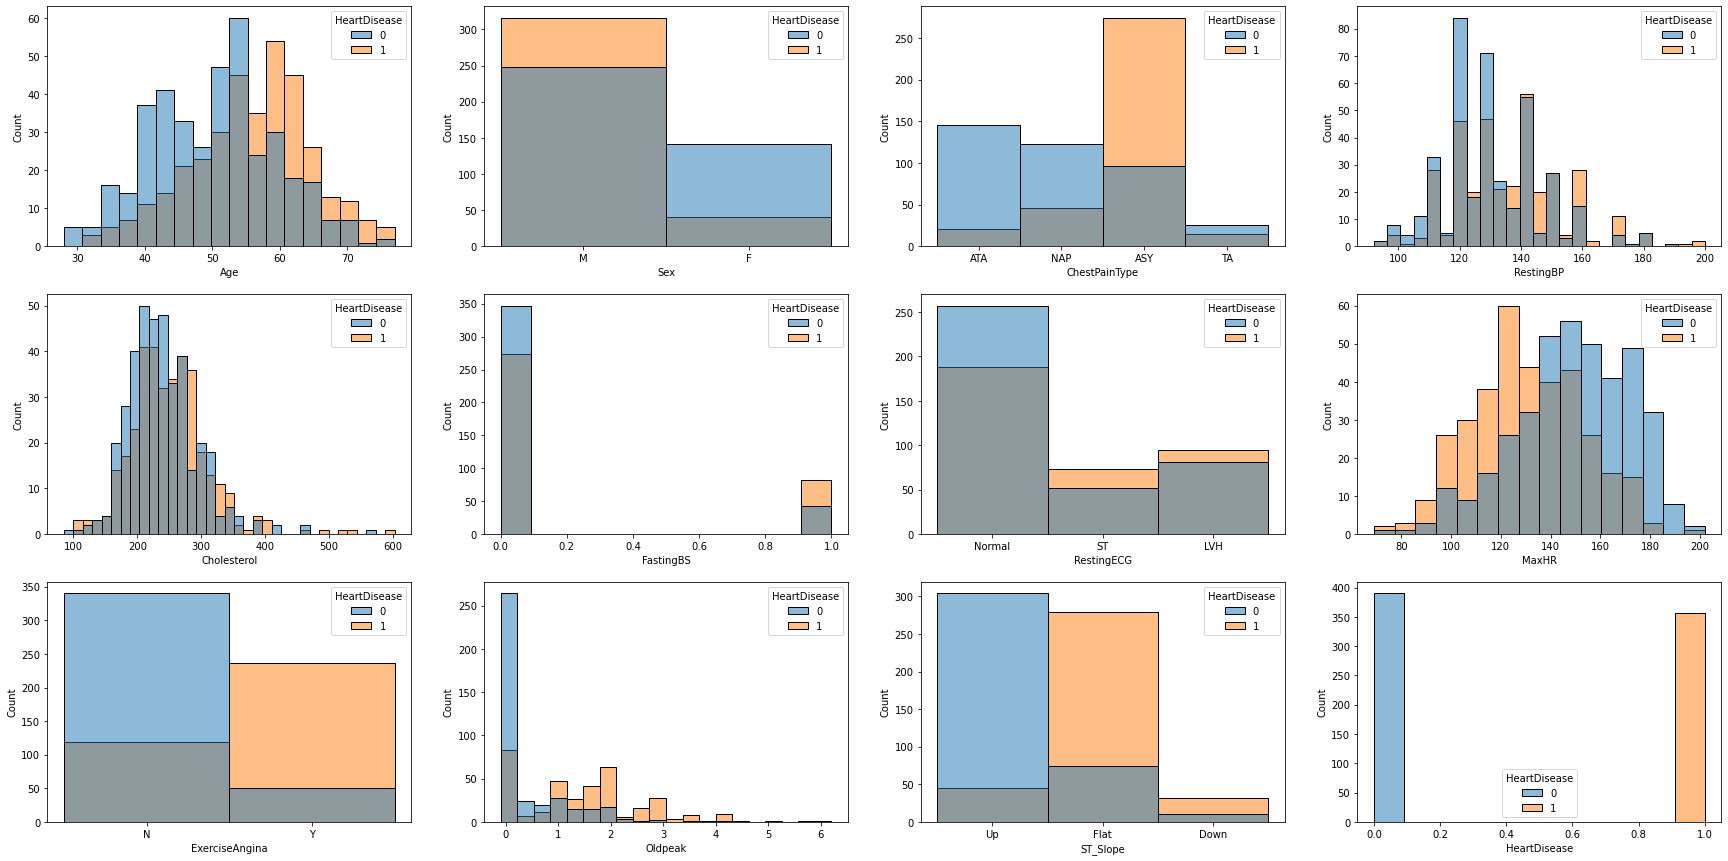

In [6]:
fig, axs = plt.subplots(3, 4,figsize=(30,15))

sns.histplot(data=data, x="Age", hue="HeartDisease", ax=axs[0,0])
sns.histplot(data=data, x="Sex", hue="HeartDisease", ax=axs[0,1])
sns.histplot(data=data, x="ChestPainType", hue="HeartDisease", ax=axs[0,2])
sns.histplot(data=data, x="RestingBP", hue="HeartDisease", ax=axs[0,3])
sns.histplot(data=data, x="Cholesterol", hue="HeartDisease", ax=axs[1,0])
sns.histplot(data=data, x="FastingBS", hue="HeartDisease", ax=axs[1,1])
sns.histplot(data=data, x="RestingECG", hue="HeartDisease", ax=axs[1,2])
sns.histplot(data=data, x="MaxHR", hue="HeartDisease", ax=axs[1,3])
sns.histplot(data=data, x="ExerciseAngina", hue="HeartDisease", ax=axs[2,0])
sns.histplot(data=data, x="Oldpeak", hue="HeartDisease", ax=axs[2,1])
sns.histplot(data=data, x="ST_Slope", hue="HeartDisease", ax=axs[2,2])
sns.histplot(data=data, x="HeartDisease",hue="HeartDisease", ax=axs[2,3])


No se observan cambios considerables en la distribución de los datos tras la pequeña limpieza de datos realizada. (Otros valores que resultaban fisiológicamente imposibles eran los que mostraban 0 de presión sanguínea (RestingBP), que fueron eliminados cuando se eliminaron los valores de colesterol 0.9)

### Conclusiones acerca del Análisis Exploratorio Visual

ECV = Enfermedad Cardio Vascular

- A mayor edad, mayor posibilidad de ECV.
- La prevalenecia es mucho mayor en hombres que en mujeres.
- El dolor de pecho asintomático es un gran indicador de una eventual ECV.
- Cuanto más baja es la presión sanguínea, menor es el riesgo de ECV, pero cuando los valores aumentan de 150 el riesgo aumenta considerablemente, y parece ser casi certero en valores mayores a 190.
- Niveles bajos de colesterol previenen ECV, y valores mayores a 290 aumentan el riesgo.
- Niveles de azúcar en sangre menores a 120 mg/dl previenen ECV.
- Alcanzar una mayor frecuencia cardíaca disminuye el riesgo de ECV. Valores menores a una frecuencia máxima de 130 aumentan el riesgo de ECV. (Este dato puede resultar contradictorio, ya que un corazón entrenado es capaz de bombear más sangre en menos latidos, quizás estará haciendo referencia a la capacidad del corazón de emitir más pulsaciones bajo estrés).
- Si el ejercicio físico induce angina hay una gran posibilidad de presentar ECV, y viceversa.
- Si el valor numérico de la pendiente del pico en los cardiogramas de la taquicardia del seno es mayor a 2, entonces hay un alto riesgo de ECV, si es 0 el riesgo es muy bajo.
- La pendiente hacia arriba disminuye el riesgo de ECV, mientras que la plana y la que va hacia abajo lo aumenta.
- El dataset está bastante equilibrado en la proporción de cateogrías de la variable target

## Correlación de los datos con la variable target

In [7]:
my_colors = ((0, 0.40, 0.75, 0.88), (1, 1, 1, 1), (0, 0.40, 0.75, 0.88))
cmap = LinearSegmentedColormap.from_list('Custom', my_colors,10)

In [8]:
my_colors = ((0.86, 0.62, 0.52, 0.88), (1, 1, 1, 1), (0, 0.40, 0.75, 0.88))
cmap = LinearSegmentedColormap.from_list('Custom', my_colors,10)

<AxesSubplot:>

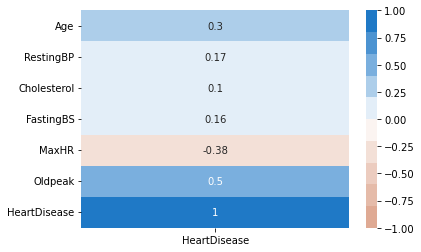

In [9]:
sns.heatmap(data.corr()[['HeartDisease']], cmap = cmap, annot = True, vmin = -1)

Se observa que las variables que tienen una correlación positiva más fuerte son ExcerciseAngina_Y, ST_Slope_Flat y Oldpeak, por lo que serían considerados indicadores de un posible ataque cardíaco. En cambio, factores como ST_Sope_Up sería un indicador de que el pronóstico es favorable y sería más rara la ocurrencia de un evento cardíaco.

## Creamos las variables dummies

In [10]:
data = pd.get_dummies(data, drop_first=True)

In [11]:
data.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0


## Se define variable target (HeartDisease) y las features

In [12]:
X = data.drop(columns=['HeartDisease'])
y = data.HeartDisease

In [13]:
round(y.value_counts(normalize=True), 2)

0    0.52
1    0.48
Name: HeartDisease, dtype: float64

La hipotesis nula seria el valor con mayor porcentaje de la muestra, en nuestro caso es 0 (que implica que no haya evento cardíaco), y obtuvo un valor de %52. Además, observamos que la variable target está bien segmentada.

## Separamos el dataset de entrenamiento.

In [14]:
# Los modelos de Bayes no necesitan estandarización
X_not_sc_train, X_not_sc_test, y_not_sc_train, y_not_sc_test = train_test_split(X, y, random_state=10)

## Creamos un modelo Gaussiano de Naive Bayes para probar inicialmente.

In [15]:
gaussian = GaussianNB()
gaussian.fit(X_not_sc_train, y_not_sc_train)

GaussianNB()

In [16]:
y_pred = gaussian.predict(X_not_sc_test)
print("Accuracy:", accuracy_score(y_not_sc_test, y_pred).round(2))
print("Recall:", round(recall_score(y_not_sc_test, y_pred), 2))

Accuracy: 0.88
Recall: 0.89


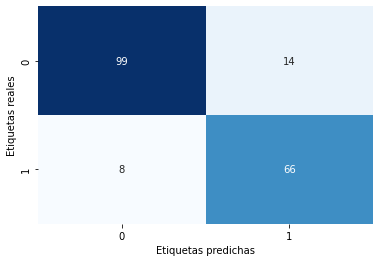

In [17]:
cm = confusion_matrix(y_not_sc_test, y_pred)
axis_labels = np.sort(y.unique())
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap="Blues")
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Vamos a probar un modelo mixto de Naive Bayes para evaluar si obtenemos mejores métricas

In [18]:
# Generamos los índices de las columnas categóricas para especificarlas como argumento en el modelo
i_categorical_cols = [i for i, col in enumerate(X_not_sc_train.columns) \
                      if len(np.unique(X_not_sc_train[col])) == 2]
naive_mixed = MixedNB(categorical_features = i_categorical_cols)
naive_mixed.fit(X_not_sc_train, y_not_sc_train)
y_pred = naive_mixed.predict(X_not_sc_test)
print("Accuracy:", accuracy_score(y_not_sc_test, y_pred).round(2))
print("Recall:", round(recall_score(y_not_sc_test, y_pred), 2))

[2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.88
Recall: 0.91


Text(0.5, 15.0, 'Etiquetas predichas')

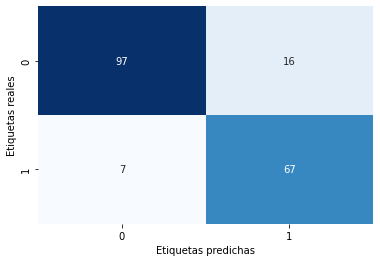

In [19]:
cm = confusion_matrix(y_not_sc_test, y_pred)
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap="Blues")
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

Las métricas del modelo Mixto dan mejores pero probaremos con otros modelos para validar la performance.

## El siguiente a aplicar sera KNN

## Estandarizamos las variables numéricas

In [20]:
scaler=StandardScaler();

X_sc=scaler.fit_transform(X);

X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, random_state=15)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
# Ajustamos a los datos de entrenamiento.
knn.fit(X_sc_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(X_sc_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", round(recall_score(y_test, y_pred), 2))

Accuracy: 0.84
Recall: 0.88


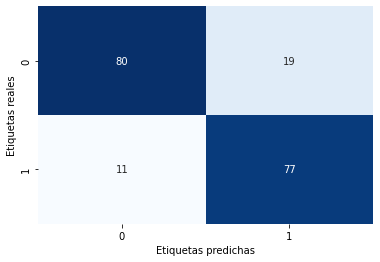

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap="Blues")
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Por último probaremos con Regresion logistica.

In [24]:
logistic_regression = LogisticRegression(penalty='none') # sin regularización
logistic_regression.fit(X_sc_train, y_train);
y_pred = logistic_regression.predict(X_sc_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", round(recall_score(y_test, y_pred), 2))

Accuracy: 0.82
Recall: 0.86


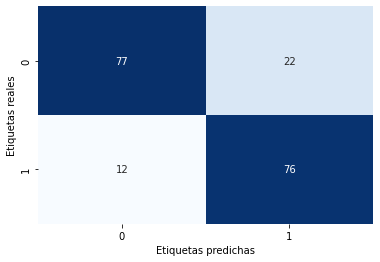

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap="Blues")
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

Comparamos con el modelo regularizado con Lasso

Accuracy: 0.82
Recall: 0.86


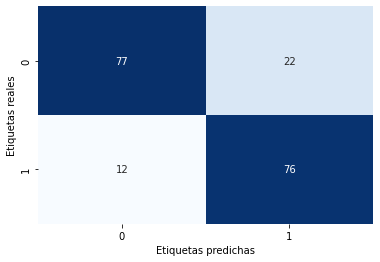

In [26]:
logistic_regression = LogisticRegression(penalty='l2') 
logistic_regression.fit(X_sc_train, y_train);
y_pred = logistic_regression.predict(X_sc_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", round(recall_score(y_test, y_pred), 2))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap="Blues")
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

Observamos que los resultados regularizados y no regularizados son prácticamente iguales.

### Como el que mejor resultados preliminares dio fue Naive Mixto decidimos avanzar con KNN realizando GridSearch y CV para ver si podemos superar a Naives

### el objetivo principal es reducir los falsos negativos, porque se trata de una enfermedad cardiaca, por lo tanto nos centraremos en obtener el mejor recall posible.

In [27]:
folds=StratifiedKFold(n_splits=5, shuffle=True) 
k_range = list(range(1, 15))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [28]:
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='recall')
grid.fit(X_sc_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.8878406708595389
{'n_neighbors': 9, 'weights': 'uniform'}


In [30]:
y_pred = grid.predict(X_sc_test)
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", round(recall_score(y_test, y_pred), 2))

Accuracy: 0.84
Recall: 0.88


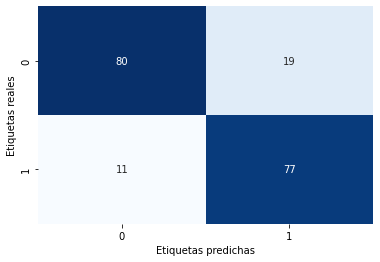

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap="Blues")
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Visualizaremos la curva ROC para evaluar la performance del modelo de de KNN obtenido a través del Cross Validation

Nos hubiese gustado tratar de obtener mejores resultados modificando el umbral del modelo Mixto de Naive Bayes, pero dado que es una librería no oficial encontramos un bug en la implementación del método .predict_proba

In [32]:
y_pred_proba = grid.predict_proba(X_sc_test)

In [33]:
fpr_knn,tpr_knn,thr_knn = roc_curve(y_test, y_pred_proba[:,1])

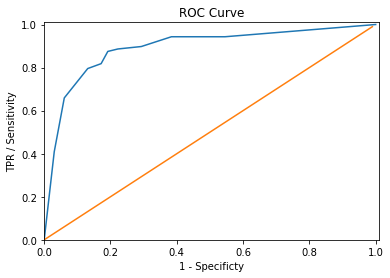

In [34]:
df = pd.DataFrame(dict(fpr=fpr_knn, tpr=tpr_knn, thr = thr_knn))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [35]:
y_pred_grid = grid.predict(X_sc_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        99
           1       0.80      0.88      0.84        88

    accuracy                           0.84       187
   macro avg       0.84      0.84      0.84       187
weighted avg       0.84      0.84      0.84       187



Text(0.5, 0, 'Umbral')

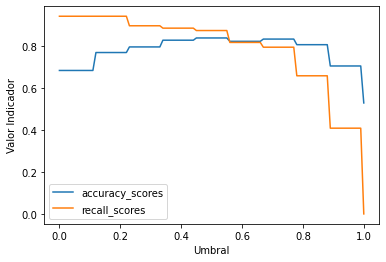

In [54]:
accuracy_scores = []
recall_scores = []

for i in np.linspace(0,1,101).tolist():
    y_pred_low_ths = (y_pred_proba[:, 1] > i).astype(int)
    ac = accuracy_score(y_test, y_pred_low_ths)
    accuracy_scores.append(ac)
    rc = recall_score(y_test, y_pred_low_ths)
    recall_scores.append(rc)
    
df_scores = pd.DataFrame({'accuracy_scores': accuracy_scores,
                          'recall_scores':recall_scores}, index=np.linspace(0,1,101).tolist())

ax = df_scores.plot()
ax.set_ylabel("Valor Indicador")
ax.set_xlabel("Umbral")

Si se observan líneas rectas en el gráfico por favor reiniciar el Kernel y probar de nuevo hasta obtener un gráfico irregular. A veces los valores de predict_proba del modelo de grid de KNN no se generan correctamente y se formatean con pocos decimales, lo que arrastra el error a este gráfico. No sabemos si el método predict_proba del modelo Mixto de Bayes desconfiguró algo.

## Buscamos el mejor umbral con el mayor recall y dentro de este el mejor accuracy

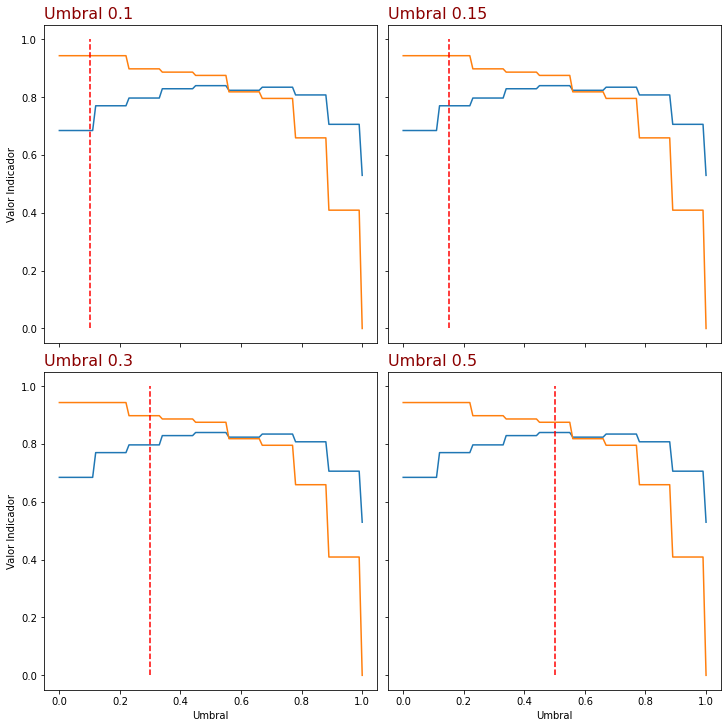

In [92]:
# Definición de subplot
fig, axs = plt.subplots(nrows = 2 , ncols=2 , figsize = (10, 10), constrained_layout=True, sharex = True , sharey = True)
# Fuente titulo.
font = {'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
# Listado de posibles umbrales para analizar
ths =[0.1 , 0.15 , 0.3, 0.5]
contador_umbral = 0

for i in range(0,2):
    axs[i,0].set_ylabel("Valor Indicador")
    axs[1,i].set_xlabel("Umbral")
    for j in range(0,2):
        axs[i,j].plot(df_scores )
    
        axs[i,j].vlines(ths[contador_umbral], ymin = 0 , ymax = 1 ,linestyles = 'dashed' , color = 'red' )
        axs[i,j].set_title(label = f'Umbral {ths[contador_umbral]}' , loc ='left', fontdict = font )
        contador_umbral+= 1

In [42]:
df_scores_filter = df_scores[(df_scores.index<0.2) & (df_scores.index>0.1)]
df_scores_filter = df_scores_filter[df_scores_filter.recall_scores==max(recall_scores)]
best_ths = df_scores_filter.tail(1).index[0]

In [43]:
y_pred_low_ths = (y_pred_proba[:, 1] > best_ths).astype(int)

Accuracy: 0.77
Recall: 0.94


Text(0.5, 15.0, 'Etiquetas predichas')

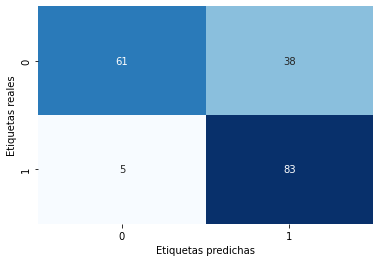

In [44]:
cm = confusion_matrix(y_test, y_pred_low_ths)
print("Accuracy:", accuracy_score(y_test, y_pred_low_ths).round(2))
print("Recall:", round(recall_score(y_test, y_pred_low_ths), 2))
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap="Blues")
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

In [45]:
print( f'Se concluye que el mejor umbral para decidir es el del {round(best_ths*100,0)}%')
print('Se observa como en el cuadrante inferior izquierdo como logramos reducir significativamente el número de Falsos Positivos.')

Se concluye que el mejor umbral para decidir es el del 19.0%
Se observa como en el cuadrante inferior izquierdo como logramos reducir significativamente el número de Falsos Positivos.


# Conclusiones

- Nuestro objetivo era obtener un Recall alto, y lo logramos. Lo logramos gracias a la optimización de los hiperparámtros del modelo y a haber encontrado el mejor valor del umbral que se adabataba a nuestros intereses.
- La búsqueda de un Recall alto disminuyó un poco el Accuracy, pero su disminución no fue significativa y logramos buscar un equilibrio entre ambos factores.
- Con los modelos implementados obtuvimos buenas métricas. Este dataset mostró gran robustez para proveer datos a los modelos de KNN, Regresión Logística y Bayes.
- Haber escogido un dataset que venía previamente limpiado facilitó gran parte del trabajo. Los resultados favorables obtenidos quizás se deban en parte también a esto. Además, todas las variables del dataset aportaban información significativa para la predicción del modelo.
